In [2]:
import numpy as np
import matplotlib.pyplot as plt
import calc_2chains_pmf_kuba
import warnings
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
warnings.filterwarnings('ignore')
!pwd

# This notebook must be run in pymbar environment

/scratch/gpfs/pekalski/jacobs/supp_test/script


# In this script parameters of gaussian repulsion in CG are found

In [3]:
path = './../step_0_umbrella_sampling_CG/CG/'

In [3]:
# All the data is stored in files coms.txt, in which the distances between the COMs
# and the Rg of one of the chains is given
#
# The data is analyzed with a script calc_2chains_pmf written by W. Jacobs
# the input data for the script is a dictionary {{r0_com, k_spring}: dist},
# where dist is the array of samples of distance between COMs
#
# BINS SHOULD BE EQUALLY POPULATED

In [4]:
# We start with sanity check: plot the av. distance between COMs as function of r0_com,
# where r0_com is the distance between the COMs set in the simulation script

In [4]:
!ls ./../step_0_umbrella_sampling_CG/CG3

r0_0.0	 r0_13.0  r0_18.0  r0_22.0  r0_4.0  r0_9.0
r0_1.0	 r0_14.0  r0_19.0  r0_23.0  r0_5.0  script_restart.sh
r0_10.0  r0_15.0  r0_2.0   r0_24.0  r0_6.0  script_start.sh
r0_11.0  r0_16.0  r0_20.0  r0_25.0  r0_7.0  tmp_restart
r0_12.0  r0_17.0  r0_21.0  r0_3.0   r0_8.0  tmp_start


## PMF calculation


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import calc_2chains_pmf
import os.path
%matplotlib inline

path = './../step_0_umbrella_sampling_CG/CG3/'
coms_m = {}

r_list = np.arange(0.0,26.0)
rg_all = np.zeros(len(r_list))
coms_mat = np.zeros(len(r_list))


for i in r_list:
        if os.path.isfile(path+'r0_'+str(i)+'/coms.txt'):
            coms = np.loadtxt(path+'r0_'+str(i)+'/coms.txt')
            
        coms_m[(i, 1.0)] = np.linalg.norm((coms[:,1:4]-coms[:,4:7]),axis=1)
        coms_mat[int(i)] = np.mean(coms_m[(i, 1.0)])
        rg_all[int(i)] = np.mean(coms[:,7])


Text(0.5, 1.0, 'Numbe of samples in each state points')

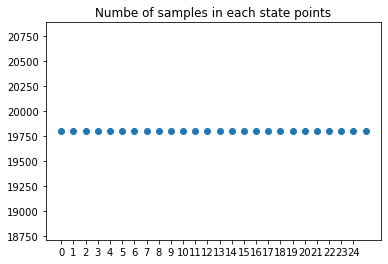

In [6]:
nsamples = [ np.shape(coms_m[(i,1.0)])[0] for i in r_list ]
plt.plot(r_list,nsamples,'o')
plt.xticks(range(25));
plt.title('Numbe of samples in each state points')

# calculating potential...
# states: [(0.0, 1.0), (1.0, 1.0), (2.0, 1.0), (3.0, 1.0), (4.0, 1.0), (5.0, 1.0), (6.0, 1.0), (7.0, 1.0), (8.0, 1.0), (9.0, 1.0), (10.0, 1.0), (11.0, 1.0), (12.0, 1.0), (13.0, 1.0), (14.0, 1.0), (15.0, 1.0), (16.0, 1.0), (17.0, 1.0), (18.0, 1.0), (19.0, 1.0), (20.0, 1.0), (21.0, 1.0), (22.0, 1.0), (23.0, 1.0), (24.0, 1.0), (25.0, 1.0)]
# N_k: [19801 19801 19801 19801 19801 19801 19801 19801 19801 19801 19801 19801
 19801 19801 19801 19801 19801 19801 19801 19801 19801 19801 19801 19801
 19801 19801]
# state (0.0, 1.0): g = 1.05315
# state (1.0, 1.0): g = 1.08114
# state (2.0, 1.0): g = 1.03541
# state (3.0, 1.0): g = 1
# state (4.0, 1.0): g = 1
# state (5.0, 1.0): g = 1
# state (6.0, 1.0): g = 1.03774
# state (7.0, 1.0): g = 1.04098
# state (8.0, 1.0): g = 1
# state (9.0, 1.0): g = 1
# state (10.0, 1.0): g = 1.08216
# state (11.0, 1.0): g = 1.04881
# state (12.0, 1.0): g = 1.01928
# state (13.0, 1.0): g = 1.03122
# state (14.0, 1.0): g = 1.02356
# state (15.

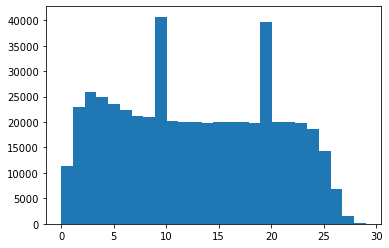

In [7]:
dr, pmf, pmf_err = calc_2chains_pmf.calc_pmf(coms_m)


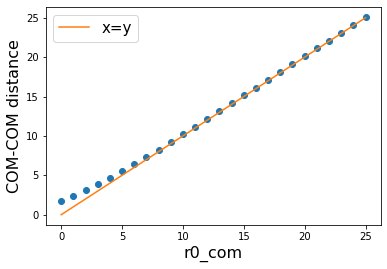

In [8]:
plt.plot(r_list,coms_mat,'o')
plt.plot(r_list,r_list,'-', label='x=y')
plt.xlabel('r0_com',fontsize=16)
plt.ylabel('COM-COM distance',fontsize=16)
plt.legend(fontsize=15)
#plt.axis([0, 25, 0, 25])

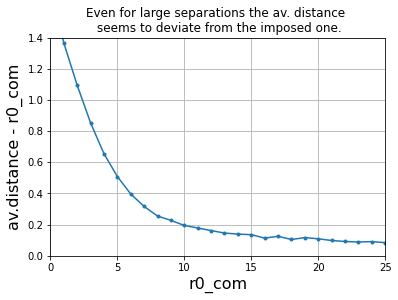

In [9]:
plt.plot(r_list, coms_mat-r_list,'.-')
plt.grid()
plt.axis([0,25,0,1.4])
plt.xlabel('r0_com', fontsize= 16)
plt.ylabel('av.distance - r0_com', fontsize = 16)
plt.title('Even for large separations the av. distance \n seems to deviate from the imposed one.')
plt.show()

Text(0.5, 1.0, 'Used data (shifted)')

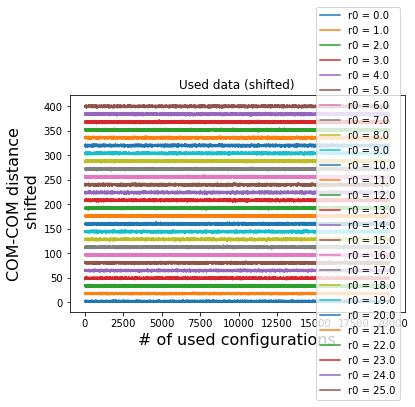

In [10]:
for i in r_list:
    disti = coms_m[(i, 1.0)]
    plt.plot(disti+15*i,label='r0 = '+str(i))
    plt.legend(loc=7)
    plt.xlabel('# of used configurations',fontsize=16)
    plt.ylabel('COM-COM distance\n shifted',fontsize=16)
    
plt.title('Used data (shifted)')    

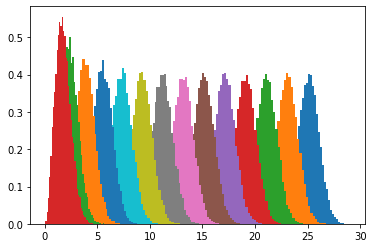

In [11]:
plt.hist(coms_m[(25,1.0)], bins = 40, density=True);
plt.hist(coms_m[(23,1.0)], bins = 40, density=True);
plt.hist(coms_m[(21,1.0)], bins = 40, density=True);
plt.hist(coms_m[(19,1.0)], bins = 40, density=True);
plt.hist(coms_m[(17,1.0)], bins = 40, density=True);
plt.hist(coms_m[(15,1.0)], bins = 40, density=True);
plt.hist(coms_m[(13,1.0)], bins = 40, density=True);
plt.hist(coms_m[(11,1.0)], bins = 40, density=True);
plt.hist(coms_m[(9,1.0)], bins = 40, density=True);
plt.hist(coms_m[(7,1.0)], bins = 40, density=True);
plt.hist(coms_m[(5,1.0)], bins = 40, density=True);
plt.hist(coms_m[(3,1.0)], bins = 40, density=True);
plt.hist(coms_m[(1,1.0)], bins = 40, density=True);
plt.hist(coms_m[(0,1.0)], bins = 40, density=True);


2.9970232902378666


Text(0.5, 1.0, 'Rg calculatd by LAMMPS')

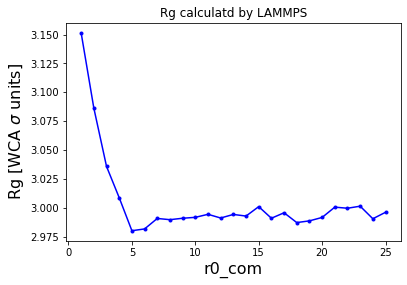

In [12]:
# Sanity check: Rg vs r0_com

plt.plot(r_list[1:],rg_all[1:],'b.-')
plt.xlabel('r0_com',fontsize=16)
plt.ylabel('Rg [WCA $\sigma$ units]',fontsize=16)
#plt.axis([r_list[0], 7, 0, 5])
plt.savefig('step_0_rg_CG.jpeg', dpi = 200)

rg = np.mean(rg_all[-6:])
print(rg)
plt.title('Rg calculatd by LAMMPS')

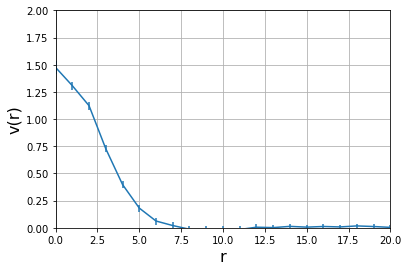

In [13]:
plt.errorbar(dr,pmf,yerr=pmf_err)
#plt.errorbar(dr,pmf,yerr=pmf_err)
#plt.errorbar(dr/rg_all,pmf,yerr=pmf_err)
#plt.plot(dr/rg,pmf,'k')
plt.xlabel('r',fontsize=16)
plt.ylabel('v(r)',fontsize=16)
plt.axis([0,20,0,2.0])
plt.grid()

plt.savefig('vr_blob.png', dpi = 250)

## Fitting gaussian $A\exp(-\alpha r^2)$ to the pmf

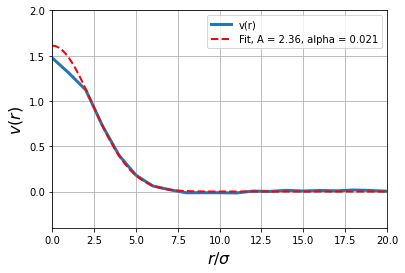

For fitting v(r) was cut at r/Rg =  1.0009932220986835 and 6.339623739958329

Fitted parameters:
A = 1.61082832827426, alpha = 0.08803552515274794


In [14]:
from scipy.optimize import curve_fit

def gaussian(x, A, alpha):
    return A*np.exp(-alpha*x**2)

d_start =3
d_stop = 19
r = dr[d_start:d_stop]
v = pmf[d_start:d_stop]

guess = [3.75, 0.7]
#popt, pcov = curve_fit(gaussian, r, v, guess, sigma = pmf_err[0:d_stop], bounds=([0,0.8],[10,10]))
popt, pcov = curve_fit(gaussian, r, v, guess, sigma = pmf_err[d_start:d_stop])

plt.figure()
plt.plot(dr, pmf, label = 'v(r)',linewidth=3)
x = np.linspace(0,20,100)
plt.plot(x, gaussian(x, *popt), 'r--', linewidth=2, label='Fit, A = 2.36, alpha = 0.021')
plt.xlabel('$r/\sigma$', fontsize = 16);
plt.ylabel('$v(r)$', fontsize = 16);
plt.axis([0.0,20,-0.4,2.0])
plt.legend()
plt.grid()
plt.savefig('effective_repulsion_CG_model.png',dpi=250)
plt.show()

#print(pcov)
print("For fitting v(r) was cut at r/Rg =  "+str(dr[d_start]/rg)+" and "+str(dr[d_stop]/rg))
print("\nFitted parameters:")
print("A = "+str(popt[0])+", alpha = "+str(popt[1]))